In [1]:
import os
import sys
from milliqanProcessor import *
from milliqanScheduler import *
from milliqanCuts import *
from milliqanPlotter import *


Welcome to JupyROOT 6.24/07


/cvmfs/cms.cern.ch/slc7_amd64_gcc10/external/py3-setuptools/60.9.3-ddcab3b6a742c72fed5554de8ccaaf18/lib/python3.9/site-packages/_distutils_hack/__init__.py:17: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/cvmfs/cms.cern.ch/slc7_amd64_gcc10/external/py3-setuptools/60.9.3-ddcab3b6a742c72fed5554de8ccaaf18/lib/python3.9/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [2]:
filelist =['/mnt/hadoop/se/store/user/milliqan/trees/v34/MilliQan_Run1190.155_v34.root:t']

In [3]:
branches = ['boardsMatched', 'height', 'layer','type','chan','pickupFlag']

In [4]:
#define the milliqan cuts object
mycuts = milliqanCuts()

#example of changing cut value
#create cut so it can read the 1 NPE signal(36mV)
heightCutLowEphoton = mycuts.getCut(mycuts.heightCut, 'heightCutLowEphoton', cut=36)

#example of cutting on events
fourLayerCut = mycuts.getCut(mycuts.fourLayerCut, 'fourLayerCut', cut=False)

In [15]:
#example of creating a combined cut
eventCuts = mycuts.getCut(mycuts.combineCuts, 'eventCuts', ['fourLayerCut', 'fourLayerCut'])

In [16]:
pickupCut = mycuts.getCut(mycuts.pickupCut, 'pickupCut', cut=True, branches=branches)

#require that all digitizer boards are matched
boardMatchCut = mycuts.getCut(mycuts.boardsMatched, 'boardMatchCut', cut=True, branches=branches)

In [17]:
#define milliqan plotter
myplotter = milliqanPlotter()

#create root histogram 
nbars = r.TH1F("n_BARS", "n_BARS", 32, 0, 32)

#add root histogram to plotter

#in my function NBarHitsplot, there is no need to use any "variable".
#The "height" at here is just a place holder, so function milliqanPlot() doesn't crash
myplotter.addHistograms(nbars, 'height')

Warning in <TROOT::Append>: Replacing existing TH1: n_BARS (Potential memory leak).


In [18]:
#defining the cutflow
cutflow = [boardMatchCut, pickupCut, mycuts.fourLayerCut, eventCuts]

#create a schedule of the cuts
myschedule = milliQanScheduler(cutflow, mycuts, myplotter)

#print out the schedule
myschedule.printSchedule()

----------------------------
MilliQan Scheduler:
	0. boardMatchCut
	1. pickupCut
	2. fourLayerCut
	3. eventCuts
----------------------------


In [19]:
#create the milliqan processor object
myiterator = milliqanProcessor(filelist, branches, myschedule, mycuts, myplotter, max_events=1000)

In [20]:
#run the milliqan processor
myiterator.run()

Number of events 1000


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


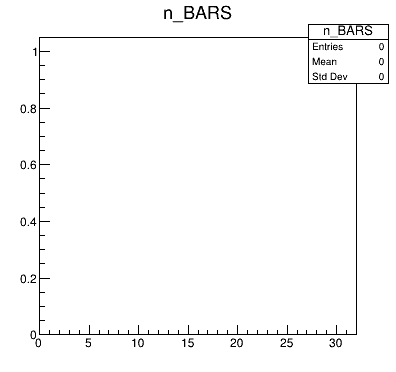

In [22]:
c1 = r.TCanvas("c1", "c1", 400, 400)
c1.cd()
nbars.Draw()
c1.Draw()